## MINST + PCA
---
- Feature 784개 ==> 주요 Feature로 압축

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from tensorflow.keras.datasets.mnist import load_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## [1] 데이터 로딩

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

## [2] 데이터 전처리 및 형변화

In [4]:
# 0-1 사이 범위값으로 피처 정규화
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
# PCA 2차원 데이터 처리 => 2D 형변환
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [6]:
print('X_train : {}'.format(X_train.shape))
print('X_test  : {}'.format(X_test.shape))

X_train : (60000, 784)
X_test  : (10000, 784)


## [2] MNIST의 PC(주성분 요소) 수 찾기
---

In [7]:
# 784개 전부를 쓰는게 아니라, 테두리 같은 필요없는 피처들은 빼고자 한다는 것
# 주성분 찾는 방법
# i) 
# -> 디폴트 값은 전체 샘플수, 전체 피처수 중에서 작은 걸로
# ii) 시각화 해서, 나타내고 싶은 정도까지의 주성분 개수를 정하고

### PCA 주성분 분석

In [8]:
# PCA 객체 생성
pca = PCA(n_components=0.95)

In [9]:
# PC 계산
pca.fit(X_train)

PCA(n_components=0.95)

In [10]:
# PC 확인
print('pca.singular_values_ : {}'.format(pca.singular_values_))
print('pca.explained_variance_ratio_  : {}'.format(pca.explained_variance_ratio_))

pca.singular_values_ : [554.08236184 473.79289646 441.76832659 412.90967564 392.45954891
 369.34743738 321.72592959 302.04650943 295.59576934 273.06366032
 258.31039157 252.97700677 232.98056847 231.36547104 223.47337767
 216.59463867 204.70103539 200.98426661 193.8016728  190.95856472
 183.65236363 178.45839561 173.68452004 169.90685928 167.17214551
 162.9474728  160.33074547 157.72351701 153.49152274 147.83552759
 144.28725    143.19277799 138.07150073 136.22239172 134.28567117
 131.13991042 126.49333601 124.2313057  123.40999747 122.22992796
 120.20481924 118.62713309 115.06215042 112.23881111 110.35705642
 108.93302362 107.01475474 105.46372614 103.71956692 100.90840213
 100.45950025  99.47658474  96.76475599  95.60902108  94.8075482
  92.66540711  92.3380578   90.42557427  89.59931997  87.99801628
  87.22623816  87.0004999   85.37550857  83.71483558  82.22568067
  80.9665046   80.14523835  78.90007754  78.10823212  77.24889952
  76.90918966  75.68727777  74.94785429  74.38349456  

In [14]:
# PC 기반 데이터 투영
# 784 -> 154
mnistPCA = pca.transform(X_train)
print('mnistPCA.shape : {}'.format(mnistPCA.shape))

mnistPCA.shape : (60000, 154)


In [15]:
# 압축된 피처 성분 기반 성분 복원 => transform된 mnistPCA를 넣어야
# 154 -> 784
reMnist = pca.inverse_transform(mnistPCA)
reMnist.shape

(60000, 784)

## 방법[1,2]

### 방법[1] : explained_variance_ratio_ 누적값으로 PC 차원수 계산

In [22]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)+1   # 0번부터 인덱스 값을 뽑기 때문에 +1
# -> 95% 이상을 만족시켜줄 수 있는 개수를 뽑아달라

print(f'주성분 갯수(차원) : {d}  =>  {d}개 이상')

주성분 갯수(차원) : 154  =>  154개 이상


### 방법[2] : n_components=비율값

In [27]:
PCA2 = PCA(n_components=0.95)
PCA2.fit(X_train)

PCA(n_components=0.95)

In [29]:
PCA2.explained_variance_, PCA2.explained_variance_ratio_

(array([5.11687301, 3.74139084, 3.25270845, 2.8416207 , 2.56711774,
        2.27366339, 1.72515498, 1.52056024, 1.45630525, 1.24275009,
        1.11208951, 1.06664054, 0.90468083, 0.89218122, 0.83235305,
        0.78190032, 0.69838687, 0.67325581, 0.62599524, 0.60776302,
        0.56214588, 0.53079883, 0.50278025, 0.48114703, 0.4657832 ,
        0.44253869, 0.42843961, 0.41461871, 0.39266734, 0.36426179,
        0.34698596, 0.34174189, 0.31773428, 0.30928082, 0.30054903,
        0.28663271, 0.26668051, 0.25722791, 0.25383802, 0.24900674,
        0.24082399, 0.23454385, 0.22065865, 0.20996268, 0.20298138,
        0.19777669, 0.19087248, 0.18537972, 0.1792988 , 0.16971126,
        0.16820466, 0.16492926, 0.15605957, 0.15235395, 0.14981035,
        0.14311701, 0.14210765, 0.13628201, 0.13380287, 0.129063  ,
        0.12680906, 0.12615355, 0.12148498, 0.11680484, 0.11268625,
        0.1092614 , 0.1070561 , 0.10375543, 0.10168329, 0.0994582 ,
        0.09858537, 0.09547766, 0.09362124, 0.09

In [30]:
minstPCA2=PCA2.transform(X_train)
minstPCA2.shape

(60000, 154)

In [32]:
minstPCA2=pd.DataFrame(minstPCA2)
minstPCA2.head()

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
0,0.486010,-1.226174,-0.096134,-2.179443,-0.107046,-0.911672,0.917630,0.626665,-1.425549,0.778149,...,-0.008177,-0.208748,-0.124838,0.002851,0.064739,-0.101237,-0.111287,0.215761,-0.078758,0.155255
1,3.967523,-1.156302,2.338587,-1.806926,-3.244217,-0.713531,-0.176551,-0.411645,0.158663,0.592035,...,0.006221,-0.249039,0.183673,0.135416,0.101673,0.109286,0.111452,0.028397,-0.048854,-0.049973
2,-0.203332,1.537934,-0.739254,2.043182,-1.202670,-0.007197,-3.368813,1.445458,-0.449200,-0.700032,...,0.152921,-0.356999,0.103831,0.051725,0.403645,-0.023730,0.292016,-0.212533,0.190117,-0.287366
3,-3.133832,-2.381166,1.073142,0.415209,-0.007268,2.743744,-1.857699,-0.264007,1.187181,0.043574,...,-0.034913,-0.135735,0.025246,0.029662,0.178867,-0.031779,0.053429,0.144324,-0.061563,-0.143237
4,-1.501000,2.864874,0.064132,-0.947833,0.384946,0.169528,-0.359477,-1.590411,0.884321,0.408283,...,0.008270,-0.040764,0.024695,-0.169255,-0.019242,0.098101,-0.113236,-0.222046,-0.129338,-0.107449


## 이미지 비교

In [16]:
# 이미지를 못보니까, 다시 복원해줘야겠지?
# PCA 전후, 이미지 비교
def drawImage(selecimg, title):
    plt.imshow(selecimg.reshape(28,28), cmap='gray')
    plt.title(f'[{title}]')
    plt.show()

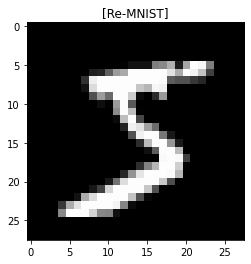

In [17]:
drawImage(X_train[0], 'Re-MNIST')

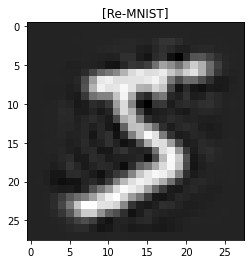

In [18]:
drawImage(reMnist[0], 'Re-MNIST')

In [19]:
# 주성분 행렬
pca.singular_values_

array([554.08236184, 473.79289646, 441.76832659, 412.90967564,
       392.45954891, 369.34743738, 321.72592959, 302.04650943,
       295.59576934, 273.06366032, 258.31039157, 252.97700677,
       232.98056847, 231.36547104, 223.47337767, 216.59463867,
       204.70103539, 200.98426661, 193.8016728 , 190.95856472,
       183.65236363, 178.45839561, 173.68452004, 169.90685928,
       167.17214551, 162.9474728 , 160.33074547, 157.72351701,
       153.49152274, 147.83552759, 144.28725   , 143.19277799,
       138.07150073, 136.22239172, 134.28567117, 131.13991042,
       126.49333601, 124.2313057 , 123.40999747, 122.22992796,
       120.20481924, 118.62713309, 115.06215042, 112.23881111,
       110.35705642, 108.93302362, 107.01475474, 105.46372614,
       103.71956692, 100.90840213, 100.45950025,  99.47658474,
        96.76475599,  95.60902108,  94.8075482 ,  92.66540711,
        92.3380578 ,  90.42557427,  89.59931997,  87.99801628,
        87.22623816,  87.0004999 ,  85.37550857,  83.71

In [20]:
# 주성분 투영 후, 분산 정도 설명
pca.explained_variance_

array([5.11687301, 3.74139084, 3.25270845, 2.8416207 , 2.56711774,
       2.27366339, 1.72515498, 1.52056024, 1.45630525, 1.24275009,
       1.11208951, 1.06664054, 0.90468083, 0.89218122, 0.83235305,
       0.78190032, 0.69838687, 0.67325581, 0.62599524, 0.60776302,
       0.56214588, 0.53079883, 0.50278025, 0.48114703, 0.4657832 ,
       0.44253869, 0.42843961, 0.41461871, 0.39266734, 0.36426179,
       0.34698596, 0.34174189, 0.31773428, 0.30928082, 0.30054903,
       0.28663271, 0.26668051, 0.25722791, 0.25383802, 0.24900674,
       0.24082399, 0.23454385, 0.22065865, 0.20996268, 0.20298138,
       0.19777669, 0.19087248, 0.18537972, 0.1792988 , 0.16971126,
       0.16820466, 0.16492926, 0.15605957, 0.15235395, 0.14981035,
       0.14311701, 0.14210765, 0.13628201, 0.13380287, 0.129063  ,
       0.12680906, 0.12615355, 0.12148498, 0.11680484, 0.11268625,
       0.1092614 , 0.1070561 , 0.10375543, 0.10168329, 0.0994582 ,
       0.09858537, 0.09547766, 0.09362124, 0.09221661, 0.08739

In [21]:
# 주성분에 투영 후, 데이터 분포 정도 (비율)
pca.explained_variance_ratio_

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357001,
       0.0210919 , 0.02022991, 0.01715818, 0.01692111, 0.01578641,
       0.01482953, 0.01324561, 0.01276897, 0.01187263, 0.01152684,
       0.01066166, 0.01006713, 0.00953573, 0.00912544, 0.00883405,
       0.00839319, 0.00812579, 0.00786366, 0.00744733, 0.00690859,
       0.00658094, 0.00648148, 0.00602615, 0.00586582, 0.00570021,
       0.00543628, 0.00505786, 0.00487859, 0.00481429, 0.00472266,
       0.00456747, 0.00444836, 0.00418501, 0.00398215, 0.00384975,
       0.00375103, 0.00362009, 0.00351591, 0.00340058, 0.00321874,
       0.00319017, 0.00312805, 0.00295983, 0.00288955, 0.0028413 ,
       0.00271436, 0.00269521, 0.00258473, 0.00253771, 0.00244781,
       0.00240506, 0.00239263, 0.00230408, 0.00221532, 0.00213721,
       0.00207225, 0.00203043, 0.00196783, 0.00192853, 0.00188632,
       0.00186977, 0.00181083, 0.00177562, 0.00174898, 0.00165